In [4]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [7]:
fertilizer = pd.read_csv(r"Fertilizer_Prediction.csv")

In [8]:
features = fertilizer.select_dtypes(include=[np.number]).columns.tolist()
print(features)

['Temparature', 'Humidity ', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']


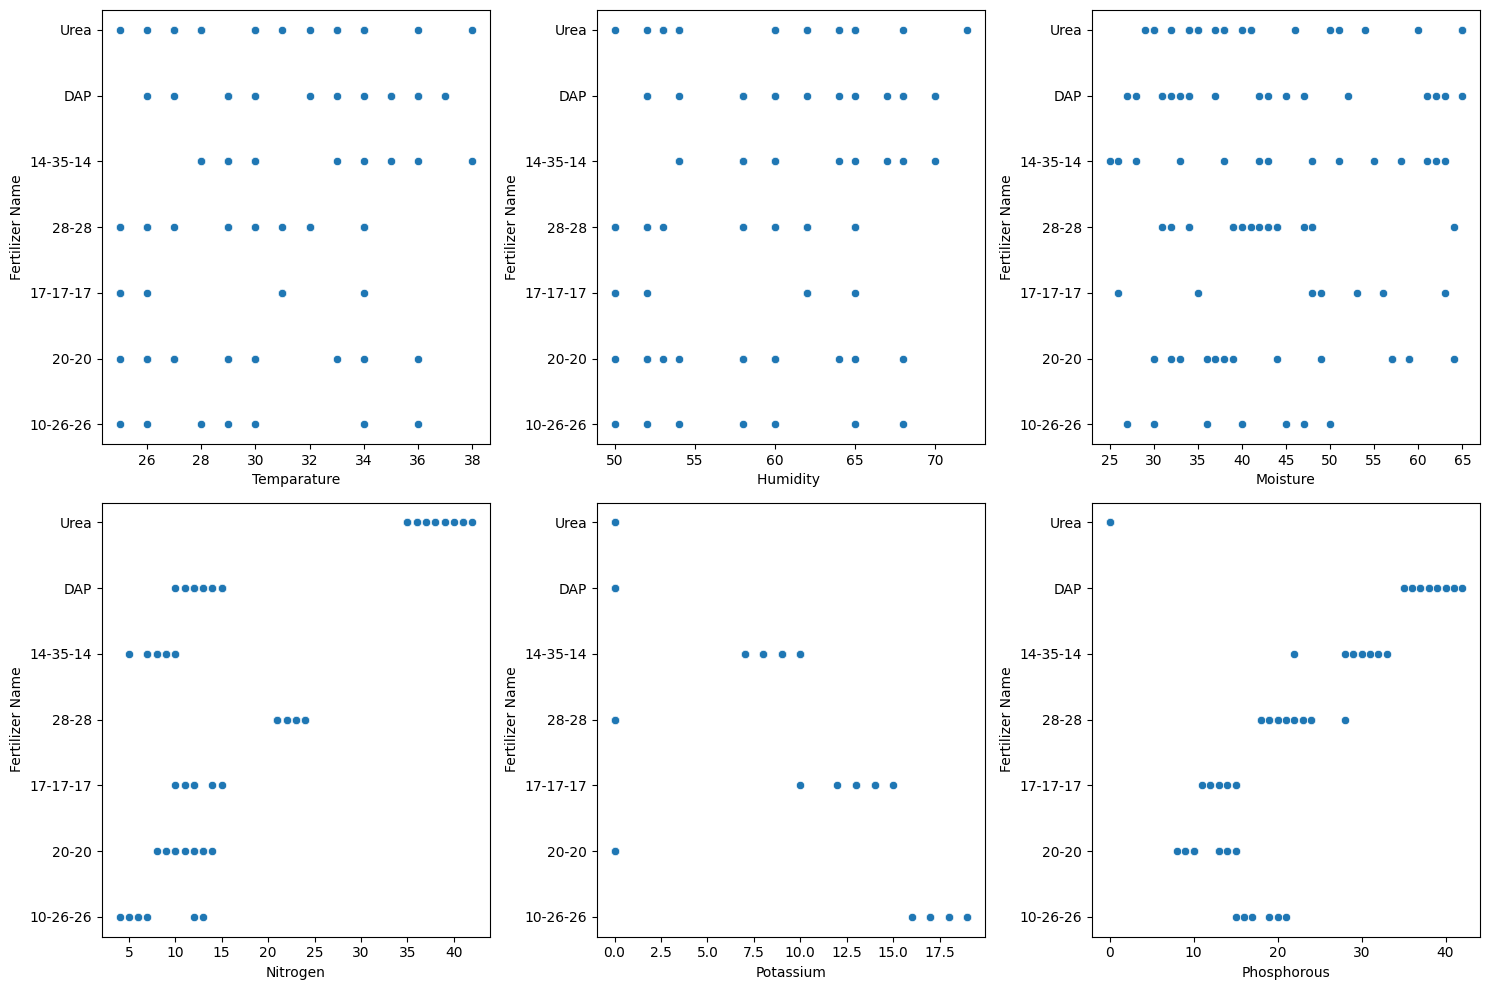

In [9]:
# plot scatter plot of each feature against the target
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i, subplot in zip(features, ax.flatten()):
    sns.scatterplot(x=i, y='Fertilizer Name', data=fertilizer, ax=subplot)
plt.tight_layout()
plt.show()

#### Encoding the target column


In [10]:
fert_dict = {
'Urea':1,
'DAP':2,
'14-35-14':3,
'28-28':4,
'17-17-17':5,
'20-20':6,
'10-26-26':7,
}

In [11]:
fertilizer['fert_no'] = fertilizer['Fertilizer Name'].map(fert_dict)

In [12]:
fertilizer['fert_no'].value_counts()

fert_no
1    22
2    18
4    17
3    14
6    14
5     7
7     7
Name: count, dtype: int64

In [13]:
# drop the target column with name and keep the target column with numbers
fertilizer.drop('Fertilizer Name',axis=1,inplace=True)
fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,fert_no
0,26,52,38,Sandy,Maize,37,0,0,1
1,29,52,45,Loamy,Sugarcane,12,0,36,2
2,34,65,62,Black,Cotton,7,9,30,3
3,32,62,34,Red,Tobacco,22,0,20,4
4,28,54,46,Clayey,Paddy,35,0,0,1


In [14]:
# Select the object columns
fertilizer.select_dtypes(include=['object']).columns

Index(['Soil Type', 'Crop Type'], dtype='object')

In [15]:
# convert the categorical columns to numerical columns using labelencoder
lb = LabelEncoder()
fertilizer["Soil Type"]=lb.fit_transform(fertilizer['Soil Type'])
fertilizer['Crop Type']=lb.fit_transform(fertilizer['Crop Type'])

In [16]:
fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,fert_no
0,26,52,38,4,3,37,0,0,1
1,29,52,45,2,8,12,0,36,2
2,34,65,62,0,1,7,9,30,3
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,1


In [17]:
# split the dataset into features and target
x = fertilizer.drop('fert_no',axis=1)
y = fertilizer['fert_no']
# print the shape of features and target
print(f"The shape of features is: {x.shape}")
print(f"The shape of target is: {y.shape}")

The shape of features is: (99, 8)
The shape of target is: (99,)


In [18]:
# split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)

# print the shape of training and testing sets
print(f"The shape of x_train is: {x_train.shape}")
print(f"The shape of x_test is: {x_test.shape}")
print(f"The shape of y_train is: {y_train.shape}")
print(f"The shape of y_test is: {y_test.shape}")

The shape of x_train is: (79, 8)
The shape of x_test is: (20, 8)
The shape of y_train is: (79,)
The shape of y_test is: (20,)


### Scaling

In [19]:
# Scale the features using StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Training Models

In [20]:
# insialize the DecisionTreeClassifier
model = DecisionTreeClassifier()

In [21]:
# train the model
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [22]:
# evaluate the model on the test set and print the accuracy
accuracy = model.score(x_test, y_test)
print(f"The accuracy of the model is: {accuracy*100:.2f}%")

The accuracy of the model is: 100.00%


In [23]:
# evaluate the model on the training set and print the accuracy
accuracy = model.score(x_train, y_train)
print(f"The accuracy of the model on the training set is: {accuracy*100:.2f}%")

The accuracy of the model on the training set is: 100.00%


## Predictive System

In [24]:
def recommend_fertilizer(Temparature, Humidity, Moisture, Soil_Type, Crop_Type, Nitrogen, Potassium, Phosphorous):
    features = np.array([[Temparature, Humidity, Moisture, Soil_Type, Crop_Type, Nitrogen, Potassium, Phosphorous]])
    transformed_features = sc.transform(features)
    prediction = model.predict(transformed_features).reshape(1,-1)
    fert_dict = {1: 'Urea', 2: 'DAP', 3: '14-35-14', 4: '28-28', 5: '17-17-17', 6: '20-20', 7: '10-26-26'}
    fertilizer = [fert_dict[i] for i in prediction[0]]
    
    return f"{fertilizer} is a best fertilizer for the given conditions" 

In [25]:
# Given input values
Temparature = 26
Humidity = 0.5
Moisture = 0.6
Soil_Type = 2
Crop_Type = 3
Nitrogen = 10
Potassium = 15
Phosphorous = 6
    
# Use the recommendation function to get a prediction
recommend_fertilizer(Temparature, Humidity, Moisture, Soil_Type, Crop_Type, Nitrogen, Potassium, Phosphorous)

"['17-17-17'] is a best fertilizer for the given conditions"